# Free Fall
## Newtonian Approach - Forces

When an object is in free fall, the only significant force acting on it is its weight:

$\sum_i \vec{F}_i = -mg\hat{z}$

### Law of Motion
$\sum_i \vec{F}_i = m \ddot{\vec{r}}$

$\Rightarrow -mg\hat{z} = m\left(\ddot{x}\hat{x} + \ddot{y}\hat{y} + \ddot{z}\hat{z} \right)$

$\Rightarrow \vec{v} = \dot{x}_0 \hat{x} + \dot{y}_0 \hat{y} + \left(- gt + \dot{z}_0 \right) \hat{z}$

$\Rightarrow \vec{r} = \left( \dot{x}_0 t + x_0 \right) \hat{x} + \left( \dot{y}_0 t + y_0 \right) \hat{y} + \left( -\frac{1}{2}g t^2 + \dot{z}_0 t + z_0 \right) \hat{z}$

### Example : Drop from a Height
$\dot{\vec{r}}_0 = \vec{0}$

$\vec{r}_0 = h\hat{z}$

$\Rightarrow \vec{v} = \left(-gt\right) \hat{z}$

$\Rightarrow \vec{r} = \left( -\frac{1}{2} g t^2 + h \right) \hat{z}$

#### Drop time
$z = 0 \Rightarrow t_\text{drop} = \sqrt{\frac{2 h}{g}}$

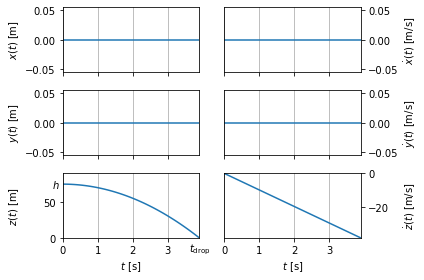

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation initial conditions & parameters
start_time = 0.                                 # t_0 = 0 s
height = 75.                                    # h [in m]
standard_gravity = 9.80665                      # g [in m/s/s]

# Calculate simulation end time
drop_time = np.sqrt(2*height/standard_gravity)  # t_drop = sqrt(2 h/g)  [in s]

# Set up array of times for which the positions and velocities will be calculated
times = np.linspace(start_time, drop_time)

# Calculate positions and velocities for all times
# r = (0, 0, -(1/2) g t^2 + h)
positions = [np.zeros(len(times)), 
             np.zeros(len(times)),
             -0.5*standard_gravity*times**2+height]
# v = (0, 0, -g t)
velocities = [np.zeros(len(times)),
              np.zeros(len(times)),
              -standard_gravity*times]

# Put r & v in a single array to loop over for subplots
variables = [positions, velocities]

# Set up matplotlib subplots [sharex=True to only label x-axis on bottom plot]
variable_number = len(variables)      # 2 = position & velocity
dimension_number = len(variables[0])  # 3 = x, y, z
figure, axes = plt.subplots(dimension_number, variable_number, sharex=True)

# Set up labels for y-axes
position_labels = [r'$x(t)$ [m]', r'$y(t)$ [m]', r'$z(t)$ [m]']
velocity_labels = [r'$\dot{x}(t)$ [m/s]', r'$\dot{y}(t)$ [m/s]', r'$\dot{z}(t)$ [m/s]']
variable_labels = [position_labels, velocity_labels] 

# Loop over r & v in each spatial dimension 
for variable_index in range(len(variable_labels)):
    for dimension_index in range(len(variable_labels[variable_index])):
        axes[dimension_index][variable_index].plot(times, variables[variable_index][dimension_index])        
        axes[dimension_index][variable_index].set_ylabel(variable_labels[variable_index][dimension_index])
        axes[dimension_index][variable_index].grid(axis='x')
        axes[dimension_index][variable_index].set_xlim([times[0], times[-1]])
        variable_extrema = [np.min(variables[variable_index][dimension_index]), np.max(variables[variable_index][dimension_index])]
        if variable_extrema[0] != variable_extrema[1]:
            axes[dimension_index, variable_index].set_ylim([variable_extrema[0], 1.2*variable_extrema[1]])
        if variable_index % 2 == 1:
            axes[dimension_index][variable_index].yaxis.set_label_position('right')
            axes[dimension_index][variable_index].yaxis.tick_right()
    axes[2][variable_index].set_xlabel(r'$t$ [s]')  # label x-axis

# Label important points on subplots
axes[2][0].text(-0.05*times[-1], height, r'$h$', va='center', ha='center')           # h on z(t)
axes[2][0].text(drop_time, -0.2*height, r'$t_{\rm drop}$', va='center', ha='center')  #

# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()

### Example : Horizontal Launch from a Cliff
$\dot{\vec{r}}_0 = v_0\hat{x}$

$\vec{r}_0 = h\hat{z}$

$\Rightarrow \vec{v} = v_0 \hat{x} + \left(-gt\right) \hat{z}$

$\Rightarrow \vec{r} = v_0 t \, \hat{x} + \left( -\frac{1}{2} g t^2 + h \right) \hat{z}$

#### Drop time
$z = 0 \Rightarrow t_\text{drop} = \sqrt{\frac{2 h}{g}}$

#### Range
$R = v_0 t_\text{drop}$

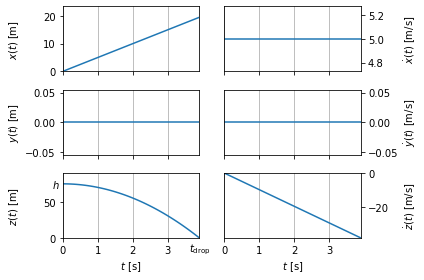

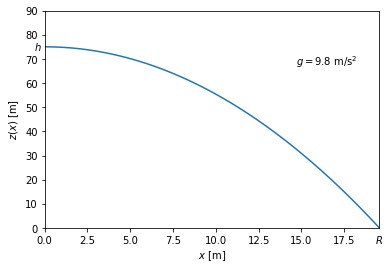

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation initial conditions & parameters
start_time = 0.                                 # t_0 = 0 s
height = 75.                                    # h [in m]
initial_velocity = 5.                           # v_0 [in m/s]
standard_gravity = 9.80665                      # g [in m/s/s]

# Calculate simulation end time
drop_time = np.sqrt(2*height/standard_gravity)  # t_drop = sqrt(2 h/g)  [in s]

# Set up array of times for which the positions and velocities will be calculated
times = np.linspace(start_time, drop_time)

# Calculate positions and velocities for all times
# r = (v_0 t, 0, -(1/2) g t^2 + h)
positions = [initial_velocity*times,
             np.zeros(len(times)),
             -0.5*standard_gravity*times**2+height]
# v = (v_0, 0, -g t)
velocities = [np.full(len(times), initial_velocity),
              np.zeros(len(times)),
              -standard_gravity*times]

# Put r & v in a single array to loop over for subplots
variables = [positions, velocities]

# Set up matplotlib subplots [sharex=True to only label x-axis on bottom plot]
variable_number = len(variables)      # 2 = position & velocity
dimension_number = len(variables[0])  # 3 = x, y, z
figure, axes = plt.subplots(dimension_number, variable_number, sharex=True)

# Set up labels for y-axes
position_labels = [r'$x(t)$ [m]', r'$y(t)$ [m]', r'$z(t)$ [m]']
velocity_labels = [r'$\dot{x}(t)$ [m/s]', r'$\dot{y}(t)$ [m/s]', r'$\dot{z}(t)$ [m/s]']
variable_labels = [position_labels, velocity_labels] 

# Loop over r & v in each spatial dimension 
for variable_index in range(len(variable_labels)):
    for dimension_index in range(len(variable_labels[variable_index])):
        axes[dimension_index][variable_index].plot(times, variables[variable_index][dimension_index])        
        axes[dimension_index][variable_index].set_ylabel(variable_labels[variable_index][dimension_index])
        axes[dimension_index][variable_index].grid(axis='x')
        axes[dimension_index][variable_index].set_xlim([times[0], times[-1]])
        variable_extrema = [np.min(variables[variable_index][dimension_index]), np.max(variables[variable_index][dimension_index])]
        if variable_extrema[0] != variable_extrema[1]:
            axes[dimension_index, variable_index].set_ylim([variable_extrema[0], 1.2*variable_extrema[1]])
        if variable_index % 2 == 1:
            axes[dimension_index][variable_index].yaxis.set_label_position('right')
            axes[dimension_index][variable_index].yaxis.tick_right()
    axes[2][variable_index].set_xlabel(r'$t$ [s]')  # label x-axis

# Label important points on subplots
axes[2][0].text(-0.05*times[-1], height, r'$h$', va='center', ha='center')           # h on z(t)
axes[2][0].text(drop_time, -0.2*height, r'$t_{\rm drop}$', va='center', ha='center')  #

# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()

# Plot z(x)
plt.plot(positions[0], positions[2])
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$z(x)$ [m]')
plt.xlim([np.min(positions[0]), np.max(positions[0])])
x_range = plt.xlim()[1] - plt.xlim()[0]
plt.ylim([np.min(positions[2]), 1.2*np.max(positions[2])])
y_range = plt.ylim()[1] - plt.ylim()[0]
plt.text(-0.02*x_range+plt.xlim()[0], height, r'$h$', va='center', ha='center')
plt.text(initial_velocity*drop_time, -0.05*y_range+plt.ylim()[0], r'$R$', va='center', ha='center')
plt.text(plt.xlim()[0]+0.75*x_range, plt.ylim()[0]+0.75*y_range, rf'$g = ${standard_gravity:.1f} m/s$^2$')
plt.show()

### Example : Angled Launch on a Flat
$\dot{\vec{r}}_0 = v_0 \left(\cos \theta_0 \hat{x} + \sin \theta \hat{z}\right)$

$\vec{r}_0 = \vec{0}$

$\Rightarrow \vec{v} = v_0 \cos \theta_0\, \hat{x} + \left( -gt + v_0 \sin \theta_0 \right) \hat{z}$

$\Rightarrow \vec{r} = v_0 \cos \theta_0\, t \, \hat{x} + \left( -\frac{1}{2} g t^2 + v_0 \sin \theta_0\,  t\right) \hat{z}$

#### Flight time
$z = 0\Rightarrow -\frac{1}{2}g t_\text{flight} + v_0 \sin \theta_0 = 0
\rightarrow t_\text{flight} = \frac{2 v_0 \sin \theta_0}{g}$

#### Range
$\Rightarrow R = v_0 \cos \theta_0\, t_\text{flight}$

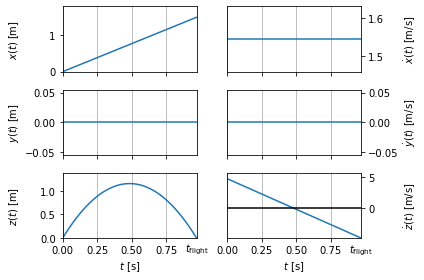

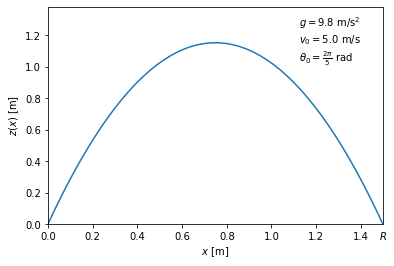

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

# Simulation initial conditions & parameters
start_time = 0.                                 # t_0 = 0 [in s]
initial_velocity = 5.                           # v_0 [in m/s]
launch_angle = 2*np.pi/5                        # θ [in rad]
standard_gravity = 9.80665                      # g [in m/s/s]

# Calculate simulation end time
flight_time = 2*initial_velocity*np.sin(launch_angle)/standard_gravity  # t_flight = 2 v_0 sinθ / g  [in s]

# Set up array of times for which the positions and velocities will be calculated
times = np.linspace(start_time, flight_time)

# Calculate positions and velocities for all times
# r = (v_0 cosθ t, 0, -(1/2) g t^2 + v_0 sinθ t)
positions = [initial_velocity*np.cos(launch_angle)*times,
             np.zeros(len(times)),
             -0.5*standard_gravity*times**2+initial_velocity*np.sin(launch_angle)*times]

# v = (v_0 cosθ, 0, -g t + v_0 sinθ)
velocities = [np.full(len(times), initial_velocity*np.cos(launch_angle)),
              np.zeros(len(times)),
              -standard_gravity*times + initial_velocity*np.sin(launch_angle)]

# Put r & v in a single array to loop over for subplots
variables = [positions, velocities]

# Set up matplotlib subplots [sharex=True to only label x-axis on bottom plot]
variable_number = len(variables)      # 2 = position & velocity
dimension_number = len(variables[0])  # 3 = x, y, z
figure, axes = plt.subplots(dimension_number, variable_number, sharex=True)

# Set up labels for y-axes
position_labels = [r'$x(t)$ [m]', r'$y(t)$ [m]', r'$z(t)$ [m]']
velocity_labels = [r'$\dot{x}(t)$ [m/s]', r'$\dot{y}(t)$ [m/s]', r'$\dot{z}(t)$ [m/s]']
variable_labels = [position_labels, velocity_labels] 

# Loop over r & v in each spatial dimension 
for variable_index in range(len(variable_labels)):
    for dimension_index in range(len(variable_labels[variable_index])):
        axes[dimension_index][variable_index].plot(times, variables[variable_index][dimension_index])        
        axes[dimension_index][variable_index].set_ylabel(variable_labels[variable_index][dimension_index])
        axes[dimension_index][variable_index].grid(axis='x')
        axes[dimension_index][variable_index].set_xlim([times[0], times[-1]])
        variable_extrema = [np.min(variables[variable_index][dimension_index]), np.max(variables[variable_index][dimension_index])]
        # Set axes only if the value of the variable changes
        if variable_extrema[0] != variable_extrema[1]:
            axes[dimension_index, variable_index].set_ylim([variable_extrema[0], 1.2*variable_extrema[1]])
        # Move axis and tick labels to the right if plot is in second column
        if variable_index % 2 == 1:
            axes[dimension_index][variable_index].yaxis.set_label_position('right')
            axes[dimension_index][variable_index].yaxis.tick_right()
        # Add horizontal line at zero if the signs on the variable extrema do not match
        if (np.sign(variable_extrema[0]) < 0 and np.sign(variable_extrema[1]) > 0) or (np.sign(variable_extrema[0]) > 0 and np.sign(variable_extrema[1]) < 0):
            axes[dimension_index][variable_index].axhline(color='black')

    # Label x-axis and mark import x-axis point on bottommost graph
    axes[-1][variable_index].set_xlabel(r'$t$ [s]') 
    vertical_range = np.max(variables[variable_index][-1])-np.min(variables[variable_index][-1])
    axes[-1][variable_index].text(flight_time, -0.2*vertical_range + np.min(variables[variable_index][-1]), r'$t_{\rm flight}$', va='center', ha='center')  

# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()

# Plot z(x)
plt.plot(positions[0], positions[2])
# Label z(x) axes
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$z(x)$ [m]')
# Set axis limits based on extrema of x and z
plt.xlim([np.min(positions[0]), np.max(positions[0])])
x_range = plt.xlim()[1] - plt.xlim()[0]
plt.ylim([np.min(positions[2]), 1.2*np.max(positions[2])])
y_range = plt.ylim()[1] - plt.ylim()[0]
# Label range
plt.text(initial_velocity*np.cos(launch_angle)*flight_time, -0.05*y_range+plt.ylim()[0], r'$R$', va='center', ha='center')
# Label acceleration due to gravity
label_string = rf'$g = ${standard_gravity:.1f} m/s$^2$'
label_string += '\n'
# Label launch velocity
label_string += rf'$v_0 = ${initial_velocity:.1f} m/s'
label_string += '\n'
# Label launch angle (converting to rational fraction times pi)
label_string += rf'$\theta_0 = $'
launch_angle_factor = Fraction(launch_angle / np.pi).limit_denominator(100)
if launch_angle_factor.numerator == 1:
    label_string += r'$\frac{\pi}{'
    label_string += str(launch_angle_factor.denominator)
    label_string += r'}$ rad'
else:
    label_string += r'$\frac{'
    label_string += str(launch_angle_factor.numerator)
    label_string += r'\pi}{'
    label_string += str(launch_angle_factor.denominator)
    label_string += r'}$ rad'
plt.text(plt.xlim()[0]+0.75*x_range, plt.ylim()[0]+0.75*y_range, label_string)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54116920-ee1e-4cba-9c74-77c1d3ea31d8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>